In [15]:
import os
import csv
import numpy as np
from matplotlib import rc
import matplotlib.pyplot as plt

In [16]:
base = '0.75'
folder = f'results_{base}'

In [17]:
rc('font', size=12, **{'family': 'serif', 'serif': ['Times New Roman']})

def ordenar_por_numero(nombre_archivo):
    # Obtener el número del nombre del archivo
    numero = int(nombre_archivo.split('=')[1].split('.')[0])
    return numero

In [18]:
folders = [folder for folder in os.listdir() if 'results' in folder]
folders

['results_0.75', 'results_1', 'results_2']

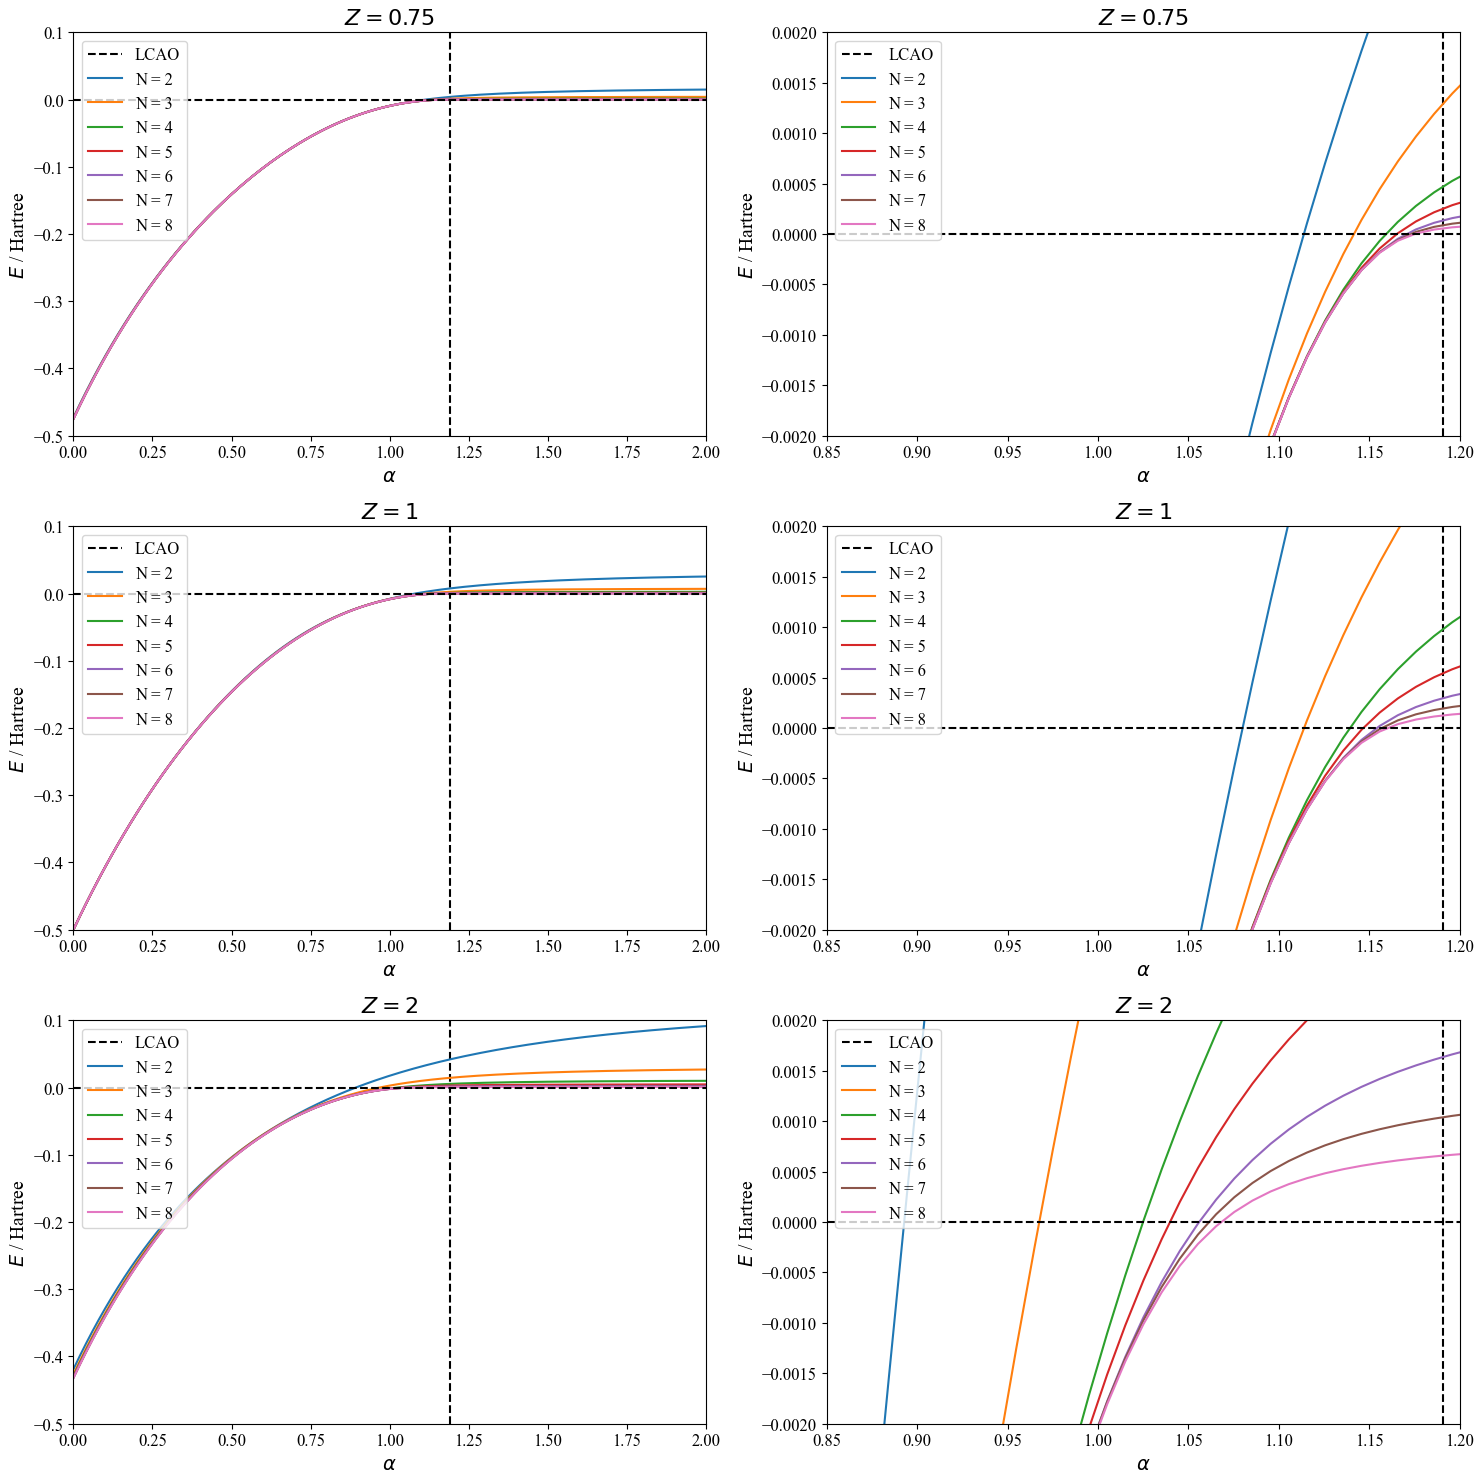

In [22]:
# colors = ['red', '#0027FF', 'green']
# lines = ['--', ':', '-.']
folders = [folder for folder in os.listdir() if 'results' in folder]

rows = 3
columns = 2

fig, axs = plt.subplots(rows, columns, figsize=(15, 15))

for k, folder in enumerate(folders):
    Z = folder.split('_')[-1]
    files = [file for file in os.listdir(f'{folder}') if file.endswith('.csv')]
    files = sorted(files, key=ordenar_por_numero)

    for n in range(2):
        for i, file in enumerate(files):
            N = int(file.split('=')[1].split('.')[0])

            alpha  = []
            energy = []

            with open(f'{folder}/{file}', newline='') as csvfile:
                reader = csv.reader(csvfile)
                next(reader)

                for row in reader:
                    alpha.append(float(row[0]))
                    energy.append(float(row[1]))


            row = k
            column = n

            if i == 0:
                axs[row, column].axvline(x=1.19061074, color='black', linestyle='--', label='LCAO')

            axs[row, column].plot(alpha, energy, label=f'N = {N}')
            axs[row, column].set_title(f'$Z = {Z}$', fontsize=16)
            axs[row, column].set_xlabel(r'$\alpha$', fontsize=14)
            axs[row, column].set_ylabel('$E$ / Hartree', fontsize=14)
            axs[row, column].grid(False)
            axs[row, column].legend(loc='upper left')
            if n == 0:
                axs[row, column].set_xlim(0, 2)
                axs[row, column].set_ylim(-0.5, 0.1)
            if n == 1:
                axs[row, column].set_xlim(0.85, 1.20)
                axs[row, column].set_ylim(-0.002, 0.002)


        energy = np.linspace(0, 0, 200).astype(int)
        axs[row, column].plot(alpha, energy, color='black', marker='', linestyle='--')


plt.tight_layout()
plt.savefig(f'yukawa_classic_bases_plot.png')
plt.savefig(f'../../../TFG/Figuras/yukawa_classic_bases_plot.png')
plt.show()